# K Nearest Neigbours

In a lot of companies, when you are interviewing for data science, one 'homework' will be to analyse data or classify data without knowing anything about the data.

This is why we are going to use the misterious `Classified Data`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('Classified Data.csv', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Scaling the data

Since the KNN determines the classification of an observation by identifying the items that are nearest to it, the scale of the variables actually matter a lot. That is because any variable that is on a large scale will have much more impact on the distance to the observation. Because of this, when we use KNN as a classifier, we want to **standardize everything to the same scale**. Luckily for us, `sklearn` has some built-in features for that.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [10]:
features_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
features_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = features_df
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Fitting the Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Predictions and Metrics

In [15]:
pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[165   8]
 [ 17 140]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       173
           1       0.95      0.89      0.92       157

    accuracy                           0.92       330
   macro avg       0.93      0.92      0.92       330
weighted avg       0.93      0.92      0.92       330



## K Neares?

Right now we only check the nearest neighbour. How will our score change based on more neighbours?

In [23]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

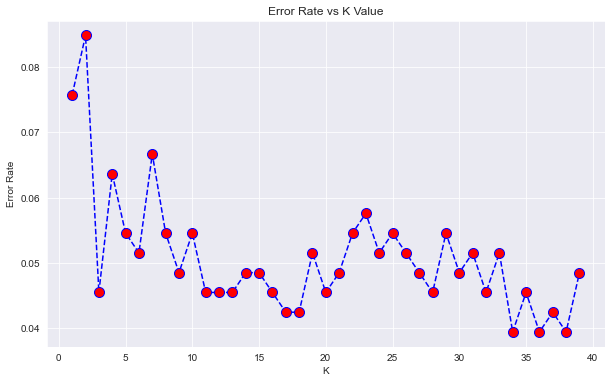

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, marker='o', linestyle='dashed', color='blue', markerfacecolor='red', ms=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')